In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Линейная регрессия: введение

Линейная регрессия — один из самых простых и базовых алгоритмов машинного обучения.  
Её цель — научиться предсказывать числовое значение целевой переменной $y$ по набору признаков $X$.

---

## Математическая модель

Мы предполагаем, что связь между признаками и целевой переменной **линейная**:

$$
\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_p x_p + b = Xw + b
$$

- $X$ — матрица признаков (размер $n \times p$)  
- $w$ — вектор весов (коэффициентов модели)  
- $b$ — смещение (intercept)  
- $\hat{y}$ — предсказанное значение  

---

## Критерий качества (функция потерь)

Мы хотим, чтобы предсказания $\hat{y}$ были как можно ближе к реальным значениям $y$.  
Для этого минимизируем **среднеквадратичную ошибку (MSE):**

$$
L(w, b) = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

## Обучение (градиентный спуск)

1. Инициализируем веса $w, b$ (например, нулями).  
2. Считаем предсказания $\hat{y}$.  
3. Вычисляем функцию потерь $L$.  
4. Находим градиенты по $w, b$.  
5. Обновляем параметры:  

$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}, \quad
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

где $\eta$ — скорость обучения (learning rate).  

6. Повторяем шаги, пока ошибка не станет достаточно маленькой.  

---

## Применения

- Прогнозирование цен (недвижимость, автомобили, товары).  
- Оценка зависимости «фактор → результат» (например, влияние рекламы на продажи).  
- Базовый «ориентир» для более сложных моделей.  

---

📌 В этом ноутбуке мы запрограммируем линейную регрессию с нуля, визуализируем процесс обучения и сравним результат со `sklearn`.



# **БОНУС** Производные и градиентный спуск (линейная регрессия)


## Напоминание правил дифференцирования
- Производная квадрата:  
  $\frac{d}{dz}(z^2) = 2z$  
- Производная суммы:  
  $\frac{d}{dz}(f(z)+g(z)) = f'(z) + g'(z)$  
- Производная сложной функции (правило цепочки):  
  $\frac{d}{dz} f(g(z)) = f'(g(z)) \cdot g'(z)$  

---

## Модель и функция потерь
Модель:
$$
\hat{y}_i = x_i^T w + b
$$

Функция потерь (MSE):
$$
L(w, b) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

## Производная по весу $w_j$
Берём одно слагаемое:
$$
(y_i - (x_i^T w + b))^2
$$

По правилу цепочки:
$$
\frac{\partial}{\partial w_j} (y_i - (x_i^T w + b))^2
= 2 (y_i - \hat{y}_i) \cdot \frac{\partial}{\partial w_j}(y_i - \hat{y}_i)
$$

А:
$$
\frac{\partial}{\partial w_j}(y_i - (x_i^T w + b)) = -x_{ij}
$$

Итого:
$$
\frac{\partial}{\partial w_j} (y_i - \hat{y}_i)^2 = -2 (y_i - \hat{y}_i) \cdot x_{ij}
$$

После суммирования по $i$ и деления на $n$:
$$
\frac{\partial L}{\partial w_j} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i) x_{ij}
$$

В матричной записи:
$$
\nabla_w L = -\frac{2}{n} X^T (y - \hat{y})
$$

---

## Производная по смещению $b$
По аналогии:
$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i)
$$

---

## Градиентный спуск
**Определение:**  
Градиентный спуск — это итеративный метод минимизации функции потерь.  
Мы двигаем параметры в направлении, противоположном градиенту.

Правило обновления:
$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}, \quad
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

где $\eta$ — скорость обучения (*learning rate*).

---

### Шаги алгоритма:
1. Считаем предсказания $\hat{y}$  
2. Вычисляем ошибку $(y - \hat{y})$  
3. Находим градиенты по $w, b$  
4. Обновляем параметры  
5. Повторяем до сходимости


## Напоминание правил дифференцирования
- Производная квадрата:  
  $\frac{d}{dz}(z^2) = 2z$  
- Производная суммы:  
  $\frac{d}{dz}(f(z)+g(z)) = f'(z) + g'(z)$  
- Производная сложной функции (правило цепочки):  
  $\frac{d}{dz} f(g(z)) = f'(g(z)) \cdot g'(z)$  

---

## Модель и функция потерь
Модель:
$$
\hat{y}_i = x_i^T w + b
$$

Функция потерь (MSE):
$$
L(w, b) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

## Производная по весу $w_j$
Берём одно слагаемое:
$$
(y_i - (x_i^T w + b))^2
$$

По правилу цепочки:
$$
\frac{\partial}{\partial w_j} (y_i - (x_i^T w + b))^2
= 2 (y_i - \hat{y}_i) \cdot \frac{\partial}{\partial w_j}(y_i - \hat{y}_i)
$$

А:
$$
\frac{\partial}{\partial w_j}(y_i - (x_i^T w + b)) = -x_{ij}
$$

Итого:
$$
\frac{\partial}{\partial w_j} (y_i - \hat{y}_i)^2 = -2 (y_i - \hat{y}_i) \cdot x_{ij}
$$

После суммирования по $i$ и деления на $n$:
$$
\frac{\partial L}{\partial w_j} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i) x_{ij}
$$

В матричной записи:
$$
\nabla_w L = -\frac{2}{n} X^T (y - \hat{y})
$$

---

## Производная по смещению $b$
По аналогии:
$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i)
$$

---

## Градиентный спуск
**Определение:**  
Градиентный спуск — это итеративный метод минимизации функции потерь.  
Мы двигаем параметры в направлении, противоположном градиенту.

Правило обновления:
$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}, \quad
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

где $\eta$ — скорость обучения (*learning rate*).

---

### Шаги алгоритма:
1. Считаем предсказания $\hat{y}$  
2. Вычисляем ошибку $(y - \hat{y})$  
3. Находим градиенты по $w, b$  
4. Обновляем параметры  
5. Повторяем до сходимости


# Практика: Линейная регрессия с нуля

Сегодня мы реализуем линейную регрессию шаг за шагом, чтобы понять:
- как строится модель,
- что такое функция потерь,
- как работает градиентный спуск.

Заполняйте пропуски в ячейках с кодом.


## Генерация данных

Мы создадим искусственный набор данных, где целевая переменная $y$ зависит от признака $x$ **по линейному закону** с добавлением шума:

$$
y = 4x + 3 + \varepsilon,
$$

где:
- $4$ — истинный коэффициент наклона (вес $w$),
- $3$ — истинное смещение (bias $b$),
- $\varepsilon$ — случайный шум (приближает реальность: данные всегда «грязные»).

Наша задача: восстановить эту зависимость по точкам $(x, y)$.


In [ ]:
# Сгенерируем данные
rng = np.random.default_rng(42)
X = rng.normal(size=(200, 1))   # один признак
y = 4 * X[:, 0] + 3 + rng.normal(scale=0.5, size=200)

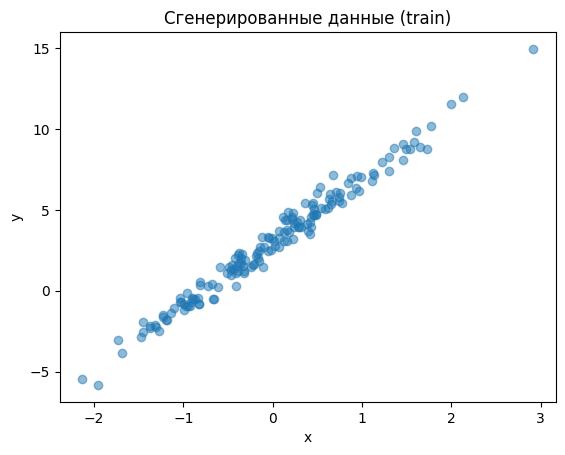

In [ ]:
# Делим на train/test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Визуализация train-части
plt.scatter(X_tr, y_tr, alpha=0.5)
plt.title("Сгенерированные данные (train)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Задание 1. Напишите функцию `predict`

Формула:
$$
\hat{y} = Xw + b
$$


In [ ]:
def predict(X, w, b):
    return X@w+b

In [ ]:
# --- Тест ---
X_test = np.array([[1.0], [2.0], [3.0]])
w_test = np.array([2.0])
b_test = 1.0

y_pred = predict(X_test, w_test, b_test)
print("y_pred =", y_pred)

assert np.allclose(y_pred, np.array([3.0, 5.0, 7.0])), "❌ Ошибка в функции predict"
print("✅ predict работает правильно")

y_pred = [3. 5. 7.]
✅ predict работает правильно


## Задание 2. Реализуйте функцию ошибки (MSE)

$$
L = \frac{1}{n} \sum (y - \hat{y})^2
$$


In [ ]:
def mse(y, y_pred):
  return np.mean((y-y_pred)**2)

In [ ]:
# --- Тест ---
y_true = np.array([1.0, 2.0, 3.0])
y_pred = np.array([1.0, 2.0, 4.0])  # ошибка в последнем значении = 1
# квадраты ошибок: [0, 0, 1], среднее = 1/3
expected = 1/3

loss = mse(y_true, y_pred)
print("loss =", loss)

assert np.isclose(loss, expected), "❌ Ошибка в функции mse"
print("✅ mse работает правильно")

loss = 0.3333333333333333
✅ mse работает правильно


In [ ]:
# --- Тест ---
y_true = np.array([1.0, 2.0, 3.0])
y_pred = np.array([1.0, 2.0, 4.0])  # ошибка в последнем значении = 1
# квадраты ошибок: [0, 0, 1], среднее = 1/3
expected = 1/3

loss = mse(y_true, y_pred)
print("loss =", loss)

assert np.isclose(loss, expected), "❌ Ошибка в функции mse"
print("✅ mse работает правильно")

loss = 0.3333333333333333
✅ mse работает правильно


## Задание 3. Реализуйте градиенты

$$
\frac{\partial L}{\partial w} = -\frac{2}{n} X^T (y - \hat{y})
$$

$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum (y - \hat{y})
$$


In [ ]:
def gradients(X, y, w, b):
    n = len(y)
    y_pred = predict(X, w, b)
    dw = -2/n*X.transpose()@(y-y_pred)
    sum=0
    for i in range(len(y)):
      sum+=(y[i]-y_pred[i])
    db = -2/n*sum
    return dw, db


In [ ]:
# --- Тест ---
X_test = np.array([[1.0], [2.0], [3.0]])
y_test = np.array([2.0, 4.0, 6.0])   # идеальная зависимость y = 2x
w_test = np.array([0.0])             # плохое приближение
b_test = 0.0

dw, db = gradients(X_test, y_test, w_test, b_test)
print("dw =", dw, "db =", db)

# Проверим направление градиента:
# так как сейчас веса занижены (0 вместо 2), dw должен быть отрицательным
assert dw < 0, "❌ Ошибка: знак градиента неправильный"
print("✅ gradients работает правильно (направление верное)")

dw = [-18.66666667] db = -8.0
✅ gradients работает правильно (направление верное)


## Задание 4. Реализуйте градиентный спуск


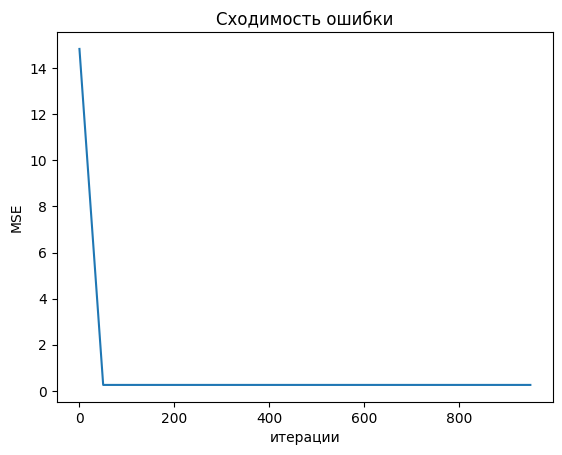

In [ ]:
w, b = [0.0], 0.0
lr = 0.1
epochs = 1000
losses = []
for step in range(epochs):
    dw, db = gradients(X_tr, y_tr, w, b)
    w -= lr * dw   # обновление весов
    b -= lr * db   # обновление смещения
    if step % 50 == 0:
        y_pred = predict(X_tr, w, b)
        losses.append(mse(y_tr, y_pred))
plt.plot(np.arange(len(losses))*50, losses)
plt.title("Сходимость ошибки")
plt.xlabel("итерации")
plt.ylabel("MSE")
plt.show()


## Задание 5. Сравните со встроенной моделью


In [ ]:
from sklearn.metrics import mean_squared_error

lin = LinearRegression().fit(X_tr, y_tr)
y_pred_skl = lin.predict(X_te)
print("Sklearn MSE:", mean_squared_error(y_te, y_pred_skl))

y_pred_our = predict(X_te, w, b)
print("Our MSE    :", mse(y_te, y_pred_our))

Sklearn MSE: 0.2485119936374281
Our MSE    : 0.24851199363742796


# Логистическая регрессия: откуда берутся модель и лог-лосс

## 1) Модель вероятности
В бинарной классификации целевая переменная $y \in \{0,1\}$. Хотим предсказывать вероятность класса $1$:
$$
P(y=1 \mid x)
$$
Линейная комбинация признаков $z = w^T x + b$ принимает значения на всём $\mathbb{R}$, а вероятность — только в $[0,1]$. Поэтому используем **сигмоиду**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
и задаём модель:
$$
P(y=1 \mid x) = \sigma(w^T x + b), \quad P(y=0 \mid x) = 1 - \sigma(w^T x + b).
$$

## 2) Почему такой лосс (лог-лосс)?
Предполагаем, что $y_i \sim \text{Bernoulli}(\hat{p}_i)$, где $\hat{p}_i = \sigma(w^T x_i + b)$.
Правдоподобие выборки (при независимости объектов):
$$
\mathcal{L}(w,b) = \prod_{i=1}^n \hat{p}_i^{\,y_i}\,(1-\hat{p}_i)^{\,1-y_i}.
$$
Берём логарифм и меняем знак (минимизируем **отрицательное лог-правдоподобие**):
$$
\text{LogLoss}(w,b) = -\frac{1}{n}\sum_{i=1}^n \Big[y_i \log \hat{p}_i + (1-y_i)\log(1-\hat{p}_i)\Big].
$$

## 3) Как обучаем?
Используем **градиентный спуск**: двигаем $(w,b)$ противоположно градиенту лог-лосса, пока он уменьшается. Для устойчивости обычно масштабируем признаки (стандартизация).


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Синтетические данные (бинарная классификация)
X, y = make_classification(n_samples=600, n_features=4, n_informative=3, n_redundant=1,
                           random_state=42, class_sep=1.2)

# train / test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Стандартизация по train
X_mean, X_std = X_tr.mean(axis=0), X_tr.std(axis=0) + 1e-8
X_trs = (X_tr - X_mean) / X_std
X_tes = (X_te - X_mean) / X_std

In [ ]:
def sigmoid(z):
    # Подсказка: используйте np.exp и защиту от переполнения (np.clip или np.maximum/-minimum по желанию)
    return 1/(1+np.exp(-z))

def predict_proba(X, w, b):
    # вернуть вероятность класса 1: σ(X @ w + b)
    return sigmoid(X@w+b)

def predict(X, w, b, threshold=0.5):
    # бинарные предсказания по порогу
    # if sigmoid(X@w+b).all()>=threshold:
    #   return 1
    # else:
    #   return 0
    probabilities = predict_proba(X, w, b)
    return (probabilities >= threshold).astype(int)


In [ ]:
def logloss(X, y, w, b, l2=0.0):
    # LogLoss = - 1/n * sum(y*math.log(p) + (1-y)*math.log(1-p)) + l2 * np.linalg.norm(w)^2
    p = predict_proba(X,w,b)                         # вероятности
    p = np.clip(p, 1e-9, 1 - 1e-9)  # числовая стабильность
    n = len(y)
    base = -1/n*sum(y*np.log(p)+(1-y)*np.log(1-p))                      # основной лог-лосс без регуляризации
    reg = l2*np.linalg.norm(w)**2                       # l2 * ||w||^2
    return base + reg

def gradients(X, y, w, b, l2=0.0):
    # dw = X.transpose()*(p - y) / n + 2*l2*w
    # db = mean(p - y)
    n = len(y)
    p = predict_proba(X,w,b)
    dw = X.transpose()@(p-y)/n+2*l2*w
    db = np.mean(p-y)
    return dw, db


In [ ]:
# Инициализация
w = np.zeros(X_trs.shape[1])
b = 0.0
lr = 0.1
epochs = 1000
l2 = 0.0

hist = []
for step in range(epochs):
    dw, db = gradients(X_trs, y_tr, w, b, l2=l2)
    w -= lr*dw
    b -= lr*db
    if step % 50 == 0:
        hist.append(logloss(X_trs, y_tr, w, b, l2=l2))

print("Train LogLoss (final):", logloss(X_trs, y_tr, w, b, l2=l2))


Train LogLoss (final): 0.23726975756012464


In [ ]:
import numpy as np

# ---- 1) тест сигмоиды ----
z = np.array([-1000, -10, 0, 10, 1000], dtype=float)
s = sigmoid(z)
assert np.all(s >= 0) and np.all(s <= 1) #"sigmoid должна давать значения в [0,1]"
assert np.isclose(s[2], 0.5, atol=1e-9) #"sigmoid(0) должна быть 0.5"

# ---- 2) predict_proba / predict формы и диапазоны ----
X_sm = np.array([[0.0, 1.0], [1.0, -1.0], [2.0, 3.0]])
w_sm = np.array([0.5, -0.25])
b_sm = 0.1
p_sm = predict_proba(X_sm, w_sm, b_sm)
assert p_sm.shape == (3,) #"predict_proba должен возвращать вектор (n,)"
assert np.all((p_sm >= 0) & (p_sm <= 1)) #"вероятности должны быть в [0,1]"
y_hat = predict(X_sm, w_sm, b_sm, threshold=0.5)
assert set(np.unique(y_hat)).issubset({0,1}) #"predict должен возвращать 0/1"

# ---- 3) лог-лосс на простом кейсе ----
# Если w=0, b=0 => p=0.5 => logloss ≈ 0.693...
X_t = np.zeros((4, 2))
y_t = np.array([0, 1, 0, 1])
w0 = np.zeros(2); b0 = 0.0
loss0 = logloss(X_t, y_t, w0, b0, l2=0.0)
assert np.isclose(loss0, 0.693147, atol=1e-3) #"logloss при p=0.5 должен быть ~0.693"

# ---- 4) проверка градиента знаком на простом кейсе ----
# Делаем данные, где истинный ответ ближе к p=1; b=0 даёт p=0.5, значит нужно увеличивать b -> db < 0 (т.к. идём w -= lr*grad)
X_g = np.zeros((5, 2))
y_g = np.ones(5)   # все единицы
w_g = np.zeros(2); b_g = 0.0
dw_g, db_g = gradients(X_g, y_g, w_g, b_g, l2=0.0)
assert db_g < 0 #"Градиент по b должен быть отрицательным, чтобы b росло при шаге обновления"

# ---- 5) численная проверка градиента (очень маленький пример) ----
rng = np.random.default_rng(0)
X_chk = rng.normal(size=(6, 3))
y_chk = rng.integers(0, 2, size=6).astype(float)
w_chk = rng.normal(size=3); b_chk = 0.1

def num_grad_w(X, y, w, b, eps=1e-5):
    g = np.zeros_like(w)
    base = logloss(X, y, w, b)
    for j in range(len(w)):
        w2 = w.copy(); w2[j] += eps
        g[j] = (logloss(X, y, w2, b) - base) / eps
    return g

def num_grad_b(X, y, w, b, eps=1e-5):
    base = logloss(X, y, w, b)
    return (logloss(X, y, w, b+eps) - base) / eps

dw_a, db_a = gradients(X_chk, y_chk, w_chk, b_chk, l2=0.0)
dw_n = num_grad_w(X_chk, y_chk, w_chk, b_chk)
db_n = num_grad_b(X_chk, y_chk, w_chk, b_chk)

assert np.allclose(dw_a, dw_n, atol=1e-4) #"dw не совпадает с численным градиентом"
assert np.isclose(db_a, db_n, atol=1e-4) #"db не совпадает с численным градиентом"

# ---- 6) обучение уменьшает лог-лосс ----
# Мини-тренировка на копии данных
X_m = X_trs[:128]; y_m = y_tr[:128]
w_m = np.zeros(X_m.shape[1]); b_m = 0.0
losses = []
for _ in range(200):
    dw, db = gradients(X_m, y_m, w_m, b_m, l2=0.0)
    w_m -= 0.1 * dw
    b_m -= 0.1 * db
    losses.append(logloss(X_m, y_m, w_m, b_m))
assert losses[-1] < losses[0] #"лог-лосс должен уменьшаться при обучении"

print("✅ Все тесты пройдены!")


✅ Все тесты пройдены!


/tmp/ipython-input-2016546357.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

proba_te = predict_proba(X_tes, w, b)
pred_te  = predict(X_tes, w, b, threshold=0.5)

print("Test Accuracy:", accuracy_score(y_te, pred_te))
print("Test ROC-AUC :", roc_auc_score(y_te, proba_te))


Test Accuracy: 0.8733333333333333
Test ROC-AUC : 0.963904694167852
